# Endurance various plots

### Load basic Endurance data

In [79]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/Endurance/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import end_load_data
import plasma_params_get_density_from_flhr_freq as dflh
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/')
import plot_spectrogram as ps
from scipy import signal

import numpy as np 
import matplotlib.pyplot as plt

import plasmapy
from astropy import units as u  

#%load_ext nb_black
plt.rcParams['figure.figsize'] = [10, 4]

"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

mag = end_load_data.mag_dc()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


dict_keys(['tvlf', 'dvlf12_mvm', 'dvlf34_mvm', 'dvlf24_mvm', 'dvlf32_mvm', 'author', 'calnote_vlf1234', 'calnote_vlf2432', 'dataunits', 'flight', 'format', 'filein', 'link', 'samplerate', 't0', 'timetagmethod', 'timeunits'])


/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:25: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


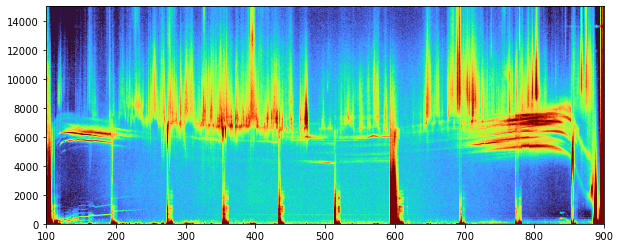

0.06826666666666667


(-5.0, 5.0)

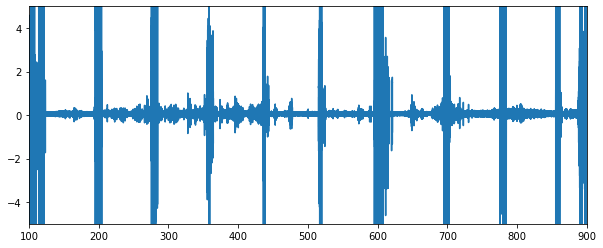

In [82]:
"""Load and plot E-field VLF data"""
evlf = end_load_data.efield_vlf()

print(evlf.keys())
fs = evlf.samplerate
freq12, tspec12, power12 = signal.spectrogram(evlf.dvlf12_mvm, fs, nperseg=16384, return_onesided=True)
#ps.plot_spectrogram(tspec12,freq12,power12,vr=[-80,-60], xr=[-100,500],yr=[0,15000],pl=1)


#freq34, tspec34, power34 = signal.spectrogram(evlf.dvlf34_mvm, fs, nperseg=4096, return_onesided=True)
freq34, tspec34, power34 = signal.spectrogram(evlf.dvlf34_mvm, fs, nperseg=4096,noverlap=2048, return_onesided=True)
ps.plot_spectrogram(tspec34,freq34,power34,yscale='linear',vr=[-85,-60],xr=[100,900],yr=[0,15000],pl=1)
print(tspec34[1] - tspec34[0])


#plt.plot(evlf.tvlf, evlf.dvlf34_mvm)
#plt.xlim(100,900)
#plt.ylim(-5,5)



58.49614
-102.354675
-30.492098


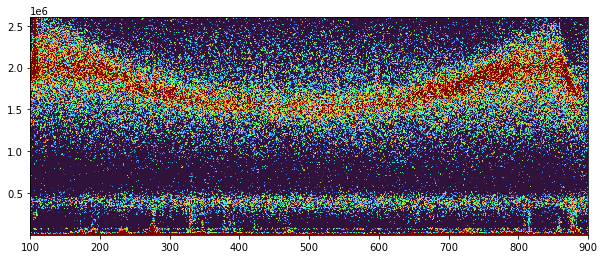

/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/plot_spectrogram.py:25: RuntimeWarning: divide by zero encountered in log10
  pn = 10.*np.log10(p)


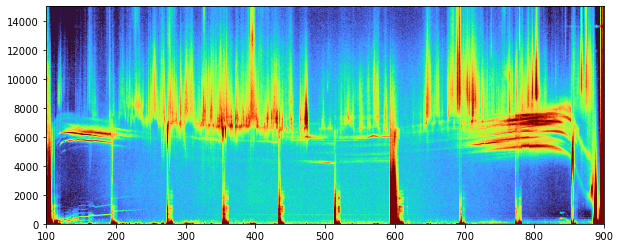

In [85]:
"""Load and plot E-field HF data"""
ehf = end_load_data.efield_hf()

hf12 = ehf.afftpow12
hf34 = ehf.afftpow34
hffreqs = ehf.afreq
hftimes = ehf.atimesfft

print(np.max(hf12))
print(np.min(hf12))

print(np.median(hf12))
#ps.plot_spectrogram(hftimes,hffreqs,hf12,pl=0,vr=[0.4,0.48],yr=[1.4e6,4.5e6],xr=[0,900])
ps.plot_spectrogram(hftimes,hffreqs,hf12,pl=0,vr=[-30,-27],yr=[2e3,2.6e6],xr=[100,900])
ps.plot_spectrogram(tspec34,freq34,power34,yscale='linear',vr=[-85,-60],xr=[100,900],yr=[0,15000],pl=1)




In [5]:
#Find density at t~500

#print(mag.keys())

tref = 200  #reference time (sec since launch)
goo = np.squeeze(np.where(mag.tsec > tref))
print(type(goo))
print(np.shape(goo))

print(mag.tsec[goo[0]])
print(mag.Bmag[goo[0]])


#flh = [8100.] * u.Hz   #@500 km
flh = [7600.] * u.Hz   #@800 km
Bo = [mag.Bmag[goo[0]]] * u.nT
print("Bo = ", Bo)

nH_ne = [0.09] * u.dimensionless_unscaled 
nO_ne = [0.91] * u.dimensionless_unscaled

fce = plasmapy.formulary.gyrofrequency(Bo, particle='electron', to_hz=True)
fcH = plasmapy.formulary.gyrofrequency(Bo, particle='H+', to_hz=True)
fcHe = plasmapy.formulary.gyrofrequency(Bo, particle='He+', to_hz=True)
fcO = plasmapy.formulary.gyrofrequency(Bo, particle='O+', to_hz=True)

print(fce, fcH, fcHe, fcO)

ne_lh = dflh.dens_IonMassFractions(flh, fce, nH_ne, nO_ne)
ne_lh2 = dflh.dens_singleion(flh, Bo, 'O+')
print("ne_lh O+", ne_lh2)


#fuh = [1.5e6, 2.2e6]
fuh = 2e6 * u.Hz
fpe = np.sqrt(fuh**2 - fce[0]**2)
ne_uh = (fpe/8980)**2
ne_uh = ne_uh.value * u.cm**-3


print(type(ne_lh[0]))
print("ne_lh fractional ", ne_lh)

print("ne_uh ", ne_uh)

ne_lh2 = ne_lh[0].value 
ne_lh = ne_lh2 * u.cm**-3

fpe = [plasmapy.formulary.plasma_frequency(ne_lh, particle='electron', to_hz=True)]
#fpe = 8980*np.sqrt(ne_lh)

#fuh = np.sqrt(0.4e6**2 + fce[0]**2)
#print(fpe/1e6, fce[0]/1e6, fuh/1e6)


<class 'numpy.ndarray'>
(1400001,)
200.000133
47280.198851158435
Bo =  [47280.19885116] nT
[1323490.48750294] Hz [720.67027432] Hz [181.41694152] Hz [45.38191055] Hz
ne_lh O+ [<Quantity 544893.26966795 1 / cm3>]
<class 'astropy.units.quantity.Quantity'>
ne_lh fractional  [<Quantity 15163.73898132 1 / cm3>]
ne_uh  27881.470447681528 1 / cm3


In [ ]:
fpe = [plasmapy.formulary.plasma_frequency(ne_lh, particle='electron', to_hz=True)]
print(fpe)


ne_lh = dflh.dens_IonMassFractions(flh, fce, nH_ne, nO_ne)
print(type(ne_lh))


In [37]:
ne2 = ne_lh[0].value
ne3 = ne2 * u.cm**-3
print(type(ne3))
ne3


<class 'astropy.units.quantity.Quantity'>


<Quantity 16022.43283451 1 / cm3>